<a href="https://colab.research.google.com/github/vigneswarivijay146/credit-card-fraud-detection/blob/main/CFD_EDA_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Sweetviz if needed
!pip install sweetviz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sv
import numpy as np


In [2]:
# Load your credit card dataset
df = pd.read_csv("/content/creditcard.csv")  # Adjust path if needed
df_clean = df.dropna()
# Basic overview
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [3]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Check datatype consistency
print("Data Types:\n", df.dtypes)

# Check class balance
print("Class Distribution:\n", df['Class'].value_counts())

Number of duplicate rows: 36
Data Types:
 Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object
Class Distribution:
 Class
0.0    5934
1.0       3
Name: count, dtype: int64


In [4]:
!pip install ydata-profiling --quiet

from ydata_profiling import ProfileReport

profile = ProfileReport(df_clean, title="Credit Card Fraud EDA Report", explorative=True)
profile.to_file("eda_report.html")  # Download from sidebar if in Colab

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:00<00:00, 35.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

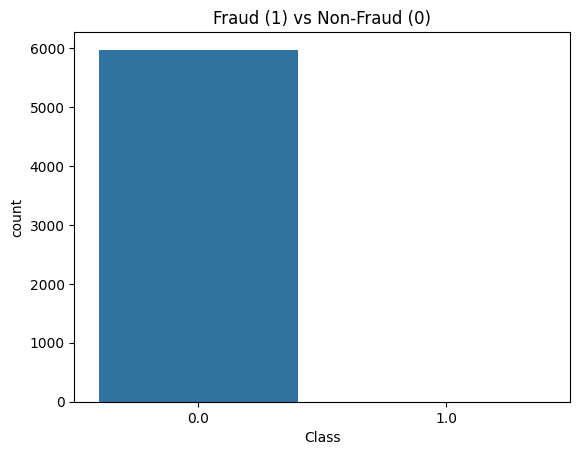

In [5]:
sns.countplot(x='Class', data=df_clean)         #target variable
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

In [6]:
fig = px.histogram(df_clean, x="Amount", color="Class", nbins=100, title="Transaction Amount Distribution")
fig.show()


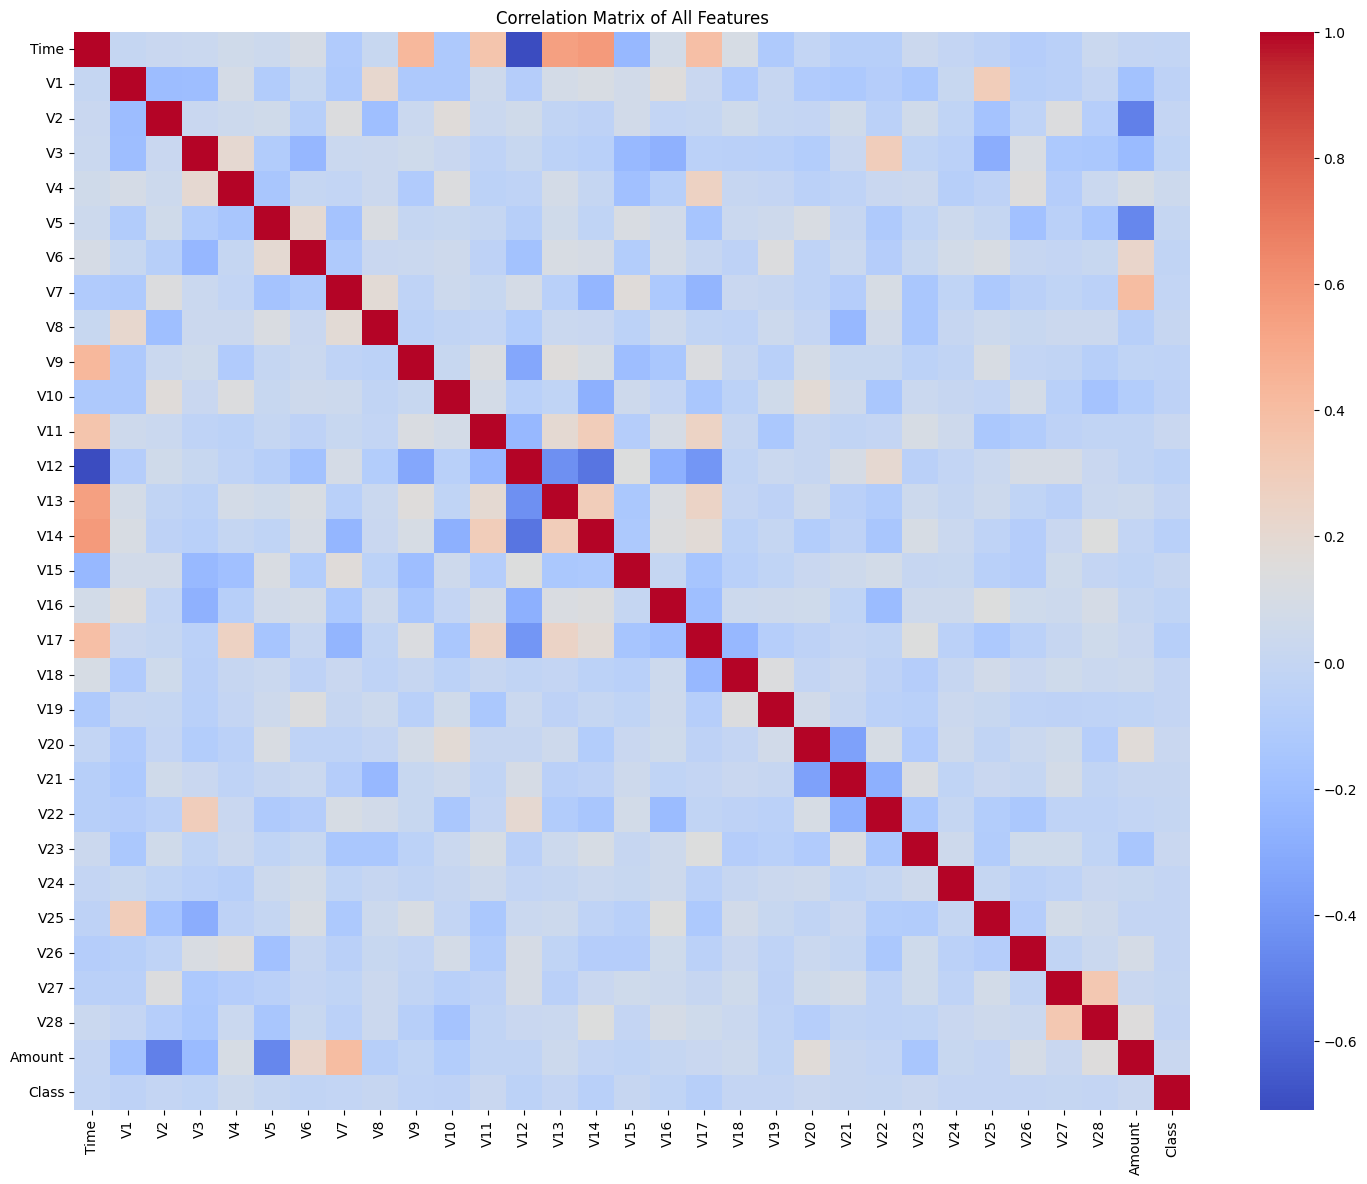

In [7]:
corr = df_clean.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of All Features")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean.drop('Class', axis=1))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df_clean['PCA1'] = pca_result[:, 0]
df_clean['PCA2'] = pca_result[:, 1]

fig = px.scatter(df_clean, x='PCA1', y='PCA2', color='Class', title='PCA Projection (2D)')
fig.show()

In [9]:
# Check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df.drop_duplicates(inplace=True)


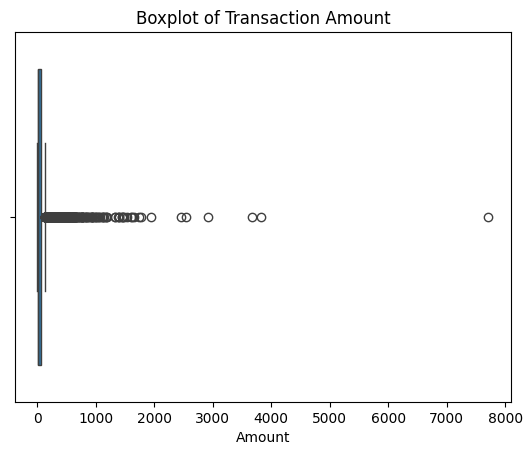

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()


In [13]:
# Check datatypes
df.dtypes


,0
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [14]:
from sklearn.preprocessing import StandardScaler #Normalization

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [15]:
# Remove rows where target 'Class' is NaN
df = df.dropna(subset=['Class'])

# Then proceed to split
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr, digits=4))


Logistic Regression Report:

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      1781
         1.0     1.0000    1.0000    1.0000         1

    accuracy                         1.0000      1782
   macro avg     1.0000    1.0000    1.0000      1782
weighted avg     1.0000    1.0000    1.0000      1782



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))


Random Forest Report:

              precision    recall  f1-score   support

         0.0     0.9994    1.0000    0.9997      1781
         1.0     0.0000    0.0000    0.0000         1

    accuracy                         0.9994      1782
   macro avg     0.4997    0.5000    0.4999      1782
weighted avg     0.9989    0.9994    0.9992      1782



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



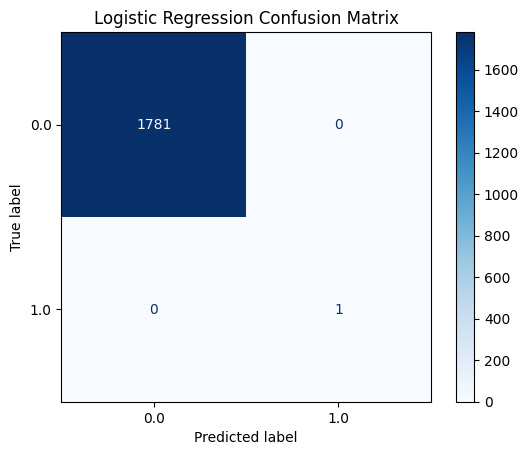

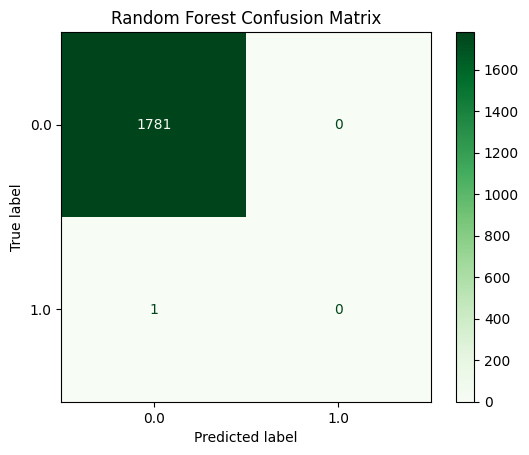

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


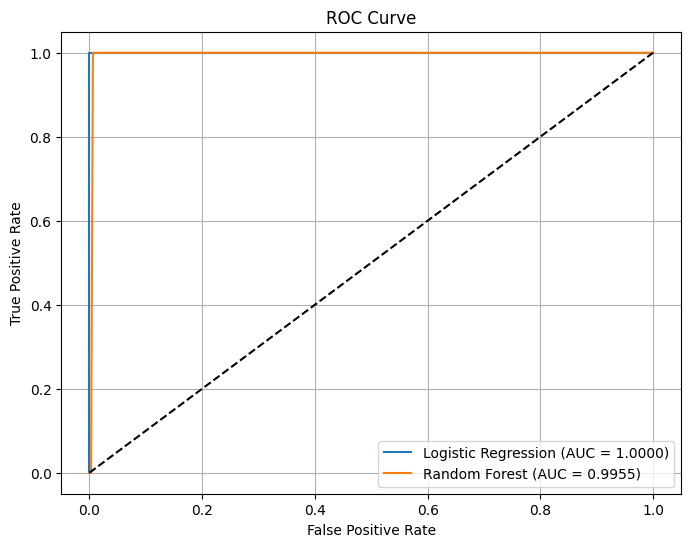

In [19]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


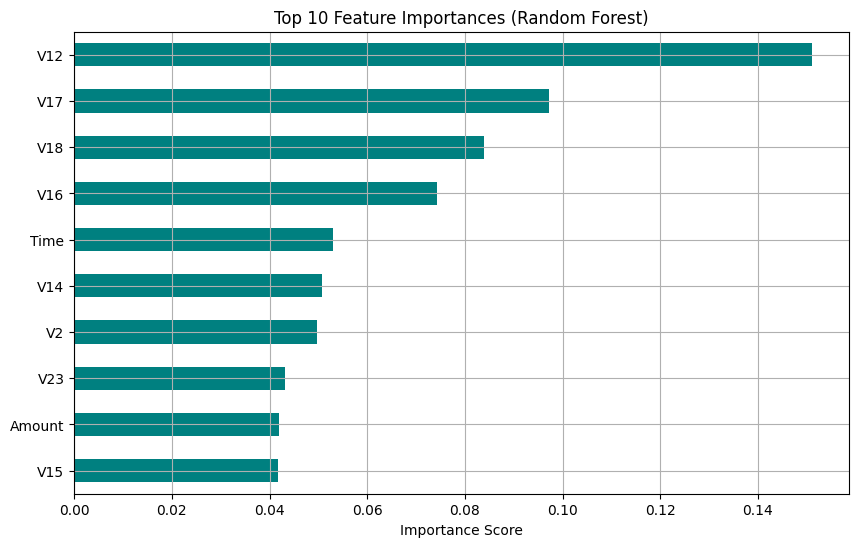

In [20]:
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
forest_importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid()
plt.show()
